# NLP

## Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [2]:
business = pd.read_csv('dataset/greenwood_business_final.csv')
reviews = pd.read_csv('dataset/greenwood_reviews.csv')
user = pd.read_csv('dataset/greenwood_user_final.csv')
# Remove Unnamed colunm
business = business.loc[:, ~business.columns.str.contains('^Unnamed')]
business = business.drop(columns='stars', axis=1)
reviews = reviews.loc[:, ~reviews.columns.str.contains('^Unnamed')]
reviews = reviews.drop(columns='city', axis=1)
user = user.loc[:, ~user.columns.str.contains('^Unnamed')]

In [3]:
#add liked column (1 if stars >= 4, 0 otherwise)
reviews['liked'] = np.where(reviews['stars']>=4, 1, 0)

In [4]:
reviews.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,liked
0,PYW8Buz8S8LpjIe6mZTAcw,dWErZLg9bzKafk5eOVolbg,X8TDMfrauatr4PBIcjfIHQ,5,2012-11-10 03:52:40,Fabulous wine selection and too many beers to ...,1,0,0,1
1,PYW8Buz8S8LpjIe6mZTAcw,eo7ZLCN_mi_1Nt135hJ0YA,eVVy0FU3t-mMYW5PnsbU5w,5,2014-04-08 02:01:49,They have a great beer selection. If you love ...,0,0,1,1
2,PYW8Buz8S8LpjIe6mZTAcw,q-ziLNTg-wLbtsmIPHtXHA,4Psac6uj06y_5EPv6CL56g,5,2012-02-09 02:17:05,"Location is incorrect, but I wish it wasn't! ...",0,0,0,1
3,PYW8Buz8S8LpjIe6mZTAcw,xzLoMvI0q_YL4VESJXbsfA,Nx3cLhGwy8aFAlcHGFg_ag,5,2012-07-27 00:57:20,Great service! I went in to buy a bottle of t...,2,0,0,1
4,PYW8Buz8S8LpjIe6mZTAcw,F2mMeY9nZPi02LBwOWdjeQ,6S6dvBFEWa4hL7evxHNWHg,4,2013-04-18 23:43:05,Very nice little liquor store with a fantastic...,0,0,0,1


## Text Preprocessing

1    10926
0     6517
Name: liked, dtype: int64
1    0.626383
0    0.373617
Name: liked, dtype: float64


<AxesSubplot: >

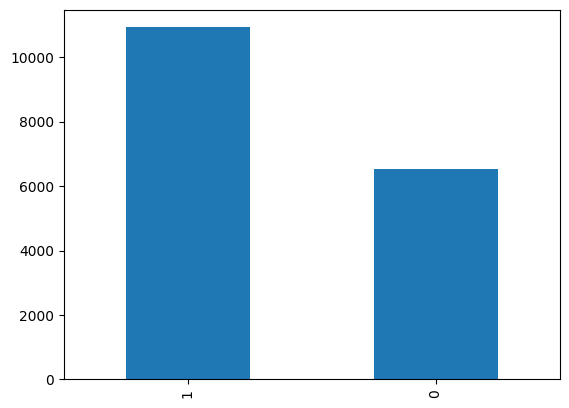

In [5]:
print(reviews['liked'].value_counts())

print(reviews['liked'].value_counts(normalize=True))

reviews['liked'].value_counts().plot(kind='bar')

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
sw = set(stopwords.words('english'))
for i in range(0, reviews['text'].size):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', reviews['text'][i])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([ps.stem(w) for w in review.split() if w not in sw])
    corpus.append(review)


In [7]:
reviews['text'][0]

"Fabulous wine selection and too many beers to count. They're always willing to help and  recommend a special order is available. We were searching for a specific wine and a specific whiskey. They special ordered it for us! This is always our first stop for anything we need because we never have to search. The wine section is very confusing the way it's organized, however, so I spend more time searching for my purchase, but otherwise, I'm a true blue regular :) Great selections in the chilled wine selections"

In [8]:
corpus[0]

'fabul wine select mani beer count alway will help recommend special order avail search specif wine specif whiskey special order us alway first stop anyth need never search wine section confus way organ howev spend time search purchas otherwis true blue regular great select chill wine select'

## Exploratory Data Analysis

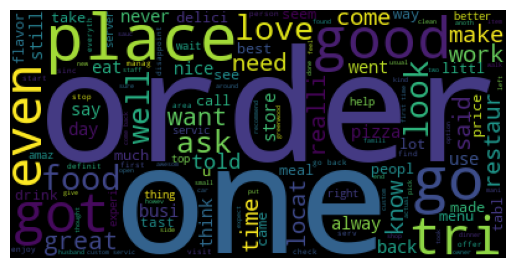

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(corpus))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Feature Extraction

### Bag-Of-Words 


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(17443, 16527)


In [11]:
print(vectorizer.get_feature_names_out())

['aa' 'aaa' 'aaaaaaaaaaaaand' ... 'zuppa' 'zx' 'zyrtec']


In [12]:
y = reviews['liked']

print(X.shape, y.shape)

(17443, 16527) (17443,)


In [13]:
from sklearn.model_selection import train_test_split

X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(X, y, test_size = 0.20, random_state = 0)


print(X_train_bag.shape, y_train_bag.shape)
print(X_test_bag.shape, y_test_bag.shape)

print("\nLabel distribution in the training set:")
print(y_train_bag.value_counts())

print("\nLabel distribution in the test set:")
print(y_test_bag.value_counts())

(13954, 16527) (13954,)
(3489, 16527) (3489,)

Label distribution in the training set:
1    8768
0    5186
Name: liked, dtype: int64

Label distribution in the test set:
1    2158
0    1331
Name: liked, dtype: int64


### 1-Hot Vectors

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_hot = CountVectorizer(binary=True)
X_hot = vectorizer_hot.fit_transform(corpus).toarray()


print(X_hot.shape)

(17443, 16527)


In [15]:
from sklearn.model_selection import train_test_split

X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(X_hot, y, test_size = 0.20, random_state = 0)



print(X_train_hot.shape, y_train_hot.shape)
print(X_test_hot.shape, y_test_hot.shape)

print("\nLabel distribution in the training set:")
print(y_train_hot.value_counts())

print("\nLabel distribution in the test set:")
print(y_test_hot.value_counts())

(13954, 16527) (13954,)
(3489, 16527) (3489,)

Label distribution in the training set:
1    8768
0    5186
Name: liked, dtype: int64

Label distribution in the test set:
1    2158
0    1331
Name: liked, dtype: int64


### TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_idf = TfidfVectorizer()

X_idf = vectorizer_idf.fit_transform(corpus).toarray()

print(X_idf.shape)

(17443, 16527)


In [17]:
from sklearn.model_selection import train_test_split

X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(X_idf, y, test_size = 0.20, random_state = 0)


print(X_train_idf.shape, y_train_idf.shape)
print(X_test_idf.shape, y_test_idf.shape)

print("\nLabel distribution in the training set:")
print(y_train_idf.value_counts())

print("\nLabel distribution in the test set:")
print(y_test_idf.value_counts())

(13954, 16527) (13954,)
(3489, 16527) (3489,)

Label distribution in the training set:
1    8768
0    5186
Name: liked, dtype: int64

Label distribution in the test set:
1    2158
0    1331
Name: liked, dtype: int64


## Naive Bayes - Generative Classifier

#### Bag Of Words

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_bag, y_train_bag)

MultinomialNB()

In [19]:
y_pred_bag = clf.predict(X_test_bag)
print(y_pred_bag)

[0 1 1 ... 1 0 1]


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('Results for Bag of Words:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_bag, y_pred_bag))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_bag, y_pred_bag)}')
print(f'Precision: {precision_score(y_test_bag, y_pred_bag)}')
print(f'F1-Score:{f1_score(y_test_bag, y_pred_bag)}')
print(f'Recall: {recall_score(y_test_bag, y_pred_bag)}')


# save the metrics in a dataframe
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
results.loc['N.B. w/ Bag of Words'] = [accuracy_score(y_test_bag, y_pred_bag), precision_score(y_test_bag, y_pred_bag), recall_score(y_test_bag, y_pred_bag), f1_score(y_test_bag, y_pred_bag)]

Results for Bag of Words:

Confusion Matrix:
[[1039  292]
 [ 219 1939]]


Accuracy: 0.8535396961880195
Precision: 0.8691169878978037
F1-Score:0.8835725677830941
Recall: 0.8985171455050973


#### 1-Hot Vectors 

In [21]:
from sklearn.naive_bayes import MultinomialNB


clf.fit(X_train_hot, y_train_hot)

y_pred_hot = clf.predict(X_test_hot)

print('1-Hot Vector Results:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_hot, y_pred_hot))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_hot, y_pred_hot)}')
print(f'Precision: {precision_score(y_test_hot, y_pred_hot)}')
print(f'F1-Score:{f1_score(y_test_hot, y_pred_hot)}')
print(f'Recall: {recall_score(y_test_hot, y_pred_hot)}')


results.loc['N.B. w/ 1-Hot Vectors'] = [accuracy_score(y_test_hot, y_pred_hot), precision_score(y_test_hot, y_pred_hot), recall_score(y_test_hot, y_pred_hot), f1_score(y_test_hot, y_pred_hot)]

1-Hot Vector Results:

Confusion Matrix:
[[1066  265]
 [ 207 1951]]


Accuracy: 0.8647176841501863
Precision: 0.8804151624548736
F1-Score:0.8920896204846822
Recall: 0.9040778498609824


#### TF-IDF 

In [28]:
from sklearn.naive_bayes import MultinomialNB


clf.fit(X_train_idf, y_train_idf)

y_pred_idf = clf.predict(X_test_idf)

print('TF-IDF Results:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_idf, y_pred_idf))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_idf, y_pred_idf)}')
print(f'Precision: {precision_score(y_test_idf, y_pred_idf)}')
print(f'F1-Score:{f1_score(y_test_idf, y_pred_idf)}')
print(f'Recall: {recall_score(y_test_idf, y_pred_idf)}')

results.loc['N.B w/ TF-IDF'] = [accuracy_score(y_test_idf, y_pred_idf), precision_score(y_test_idf, y_pred_idf), recall_score(y_test_idf, y_pred_idf), f1_score(y_test_idf, y_pred_idf)]

TF-IDF Results:

Confusion Matrix:
[[ 859  472]
 [  79 2079]]


Accuracy: 0.8420750931498997
Precision: 0.8149745197961583
F1-Score:0.882990019112338
Recall: 0.9633920296570899


## Balanced Random Forest - Discriminative Classifier

- Address the issue of class imbalance in classification problem


#### Bag of Words

In [ ]:
#create random forest classifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


rf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train_bag, y_train_bag)

y_pred_bag_rf = rf.predict(X_test_bag)

print('Results for Bag of Words:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_bag, y_pred_bag_rf))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_bag, y_pred_bag_rf)}')
print(f'Precision: {precision_score(y_test_bag, y_pred_bag_rf)}')
print(f'F1-Score:{f1_score(y_test_bag, y_pred_bag_rf)}')
print(f'Recall: {recall_score(y_test_bag, y_pred_bag_rf)}')


results.loc['R.F. w/ Bag of Words'] = [accuracy_score(y_test_bag, y_pred_bag_rf), precision_score(y_test_bag, y_pred_bag_rf), recall_score(y_test_bag, y_pred_bag_rf), f1_score(y_test_bag, y_pred_bag_rf)]



/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Results for Bag of Words:

Confusion Matrix:
[[1162  169]
 [ 335 1823]]


Accuracy: 0.8555460017196904
Precision: 0.9151606425702812
F1-Score:0.8785542168674699
Recall: 0.8447636700648748


#### 1-Hot Vectors

In [ ]:

#create random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = BalancedRandomForestClassifier(n_estimators=10, random_state=0)

rf.fit(X_train_hot, y_train_hot)

y_pred_hot_rf = rf.predict(X_test_hot)

print('Results for Bag of Words:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_hot, y_pred_hot_rf))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_hot, y_pred_hot_rf)}')
print(f'Precision: {precision_score(y_test_hot, y_pred_hot_rf)}')
print(f'F1-Score:{f1_score(y_test_hot, y_pred_hot_rf)}')
print(f'Recall: {recall_score(y_test_hot, y_pred_hot_rf)}')


results.loc['R.F. w/ 1-Hot Vectors'] = [accuracy_score(y_test_hot, y_pred_hot_rf), precision_score(y_test_hot, y_pred_hot_rf), recall_score(y_test_hot, y_pred_hot_rf), f1_score(y_test_hot, y_pred_hot_rf)]




/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Results for Bag of Words:

Confusion Matrix:
[[1146  185]
 [ 558 1600]]


Accuracy: 0.7870449985669247
Precision: 0.896358543417367
F1-Score:0.8115647983768703
Recall: 0.7414272474513438


#### TF-IDF

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

#create random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = BalancedRandomForestClassifier(n_estimators=10, random_state=0)

rf.fit(X_train_idf, y_train_idf)

y_pred_idf_rf = rf.predict(X_test_idf)

print('Results for Bag of Words:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_idf, y_pred_idf_rf))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_idf, y_pred_idf_rf)}')
print(f'Precision: {precision_score(y_test_idf, y_pred_idf_rf)}')
print(f'F1-Score:{f1_score(y_test_idf, y_pred_idf_rf)}')
print(f'Recall: {recall_score(y_test_idf, y_pred_idf_rf)}')

results.loc['R.F. w/ TF-IDF'] = [accuracy_score(y_test_idf, y_pred_idf_rf), precision_score(y_test_idf, y_pred_idf_rf), recall_score(y_test_idf, y_pred_idf_rf), f1_score(y_test_idf, y_pred_idf_rf)]




/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Results for Bag of Words:

Confusion Matrix:
[[1128  203]
 [ 545 1613]]


Accuracy: 0.7856119231871597
Precision: 0.888215859030837
F1-Score:0.8117765475591344
Recall: 0.747451343836886


In [ ]:
results

## SVM - Discriminative Classifier

### Bag of Words

In [ ]:
#create a support vector machine classifier
from sklearn.svm import SVC

clf_svm = SVC(kernel='linear')

clf_svm.fit(X_train_bag, y_train_bag)

y_pred_bag_svm = clf_svm.predict(X_test_bag)

print('Results for Bag of Words:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_bag, y_pred_bag_svm))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_bag, y_pred_bag_svm)}')
print(f'Precision: {precision_score(y_test_bag, y_pred_bag_svm)}')
print(f'F1-Score:{f1_score(y_test_bag, y_pred_bag_svm)}')
print(f'Recall: {recall_score(y_test_bag, y_pred_bag_svm)}')


results.loc['SVM w/ Bag of Words'] = [accuracy_score(y_test_bag, y_pred_bag_svm), precision_score(y_test_bag, y_pred_bag_svm), recall_score(y_test_bag, y_pred_bag_svm), f1_score(y_test_bag, y_pred_bag_svm)]




### 1-Hot Vectors

In [ ]:
clf_svm.fit(X_train_hot, y_train_hot)

y_pred_hot = clf_svm.predict(X_test_hot)

print('1-Hot Vector Results:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_hot, y_pred_hot))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_hot, y_pred_hot)}')
print(f'Precision: {precision_score(y_test_hot, y_pred_hot)}')
print(f'F1-Score:{f1_score(y_test_hot, y_pred_hot)}')
print(f'Recall: {recall_score(y_test_hot, y_pred_hot)}')


results.loc['SVM w/ 1-Hot Vectors'] = [accuracy_score(y_test_hot, y_pred_hot), precision_score(y_test_hot, y_pred_hot), recall_score(y_test_hot, y_pred_hot), f1_score(y_test_hot, y_pred_hot)]

### TF-IDF

In [ ]:
clf_svm.fit(X_train_idf, y_train_idf)

y_pred_idf = clf_svm.predict(X_test_idf)

print('TF-IDF Results:\n')
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_idf, y_pred_idf))
print('\n')
# accuracy, precision, recall, f1
print(f'Accuracy: {accuracy_score(y_test_idf, y_pred_idf)}')
print(f'Precision: {precision_score(y_test_idf, y_pred_idf)}')
print(f'F1-Score:{f1_score(y_test_idf, y_pred_idf)}')
print(f'Recall: {recall_score(y_test_idf, y_pred_idf)}')


results.loc['SVM w/ TF-IDF'] = [accuracy_score(y_test_idf, y_pred_idf), precision_score(y_test_idf, y_pred_idf), recall_score(y_test_idf, y_pred_idf), f1_score(y_test_idf, y_pred_idf)]

## Model Results

In [ ]:
results

,Accuracy,Precision,Recall,F1-Score
N.B. w/ Bag of Words,0.853540,0.869117,0.898517,0.883573
N.B. w/ 1-Hot Vectors,0.864718,0.880415,0.904078,0.892090
N.B w/ TF-IDF,0.842075,0.814975,0.963392,0.882990
R.F. w/ Bag of Words,0.855546,0.915161,0.844764,0.878554
R.F. w/ 1-Hot Vectors,0.787045,0.896359,0.741427,0.811565
R.F. w/ TF-IDF,0.785612,0.888216,0.747451,0.811777


<Figure size 3840x2160 with 0 Axes>

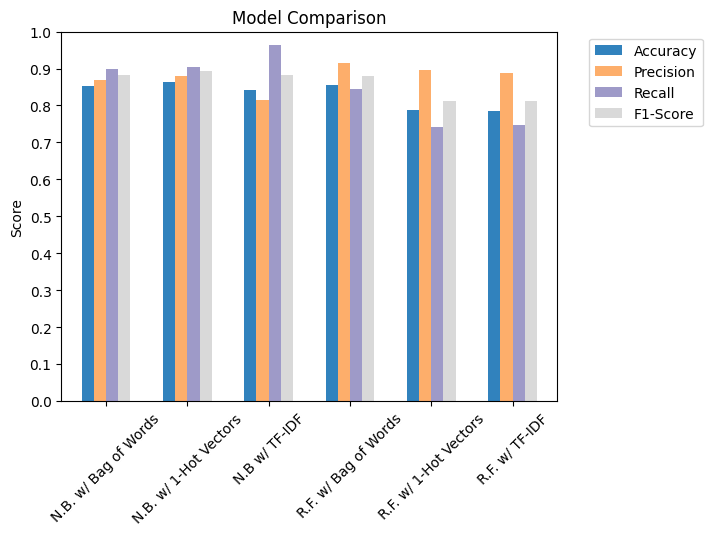

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define a sequential colormap from white to blue
cmap = cm.get_cmap('tab20c')

# Create a smaller figure size
plt.figure(figsize=(3840/100, 2160/100))  # 4K resolution is typically 3840x2160 pixels

# Plot the data using the colormap and reduce the bar width
results.plot(kind='bar', width=0.6, colormap=cmap)

# Set the y-axis ticks closer to each other
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the y-axis ticks
plt.yticks([i/10 for i in range(11)])  # Customize the range and spacing as needed

# Save the plot as a 4K image with a specified DPI (dots per inch) and no cropping
plt.savefig('model_comparison_4k.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
results

,level_0,index,Accuracy,Precision,Recall,F1-Score,Class,Model
Model,,,,,,,,
0,0,N.B. w/ Bag of Words,0.853540,0.869117,0.898517,0.883573,1,0
1,1,N.B. w/ 1-Hot Vectors,0.864718,0.880415,0.904078,0.892090,1,1
2,2,N.B w/ TF-IDF,0.842075,0.814975,0.963392,0.882990,1,2
3,3,R.F. w/ Bag of Words,0.855546,0.915161,0.844764,0.878554,1,3
4,4,R.F. w/ 1-Hot Vectors,0.787045,0.896359,0.741427,0.811565,1,4
5,5,R.F. w/ TF-IDF,0.785612,0.888216,0.747451,0.811777,1,5


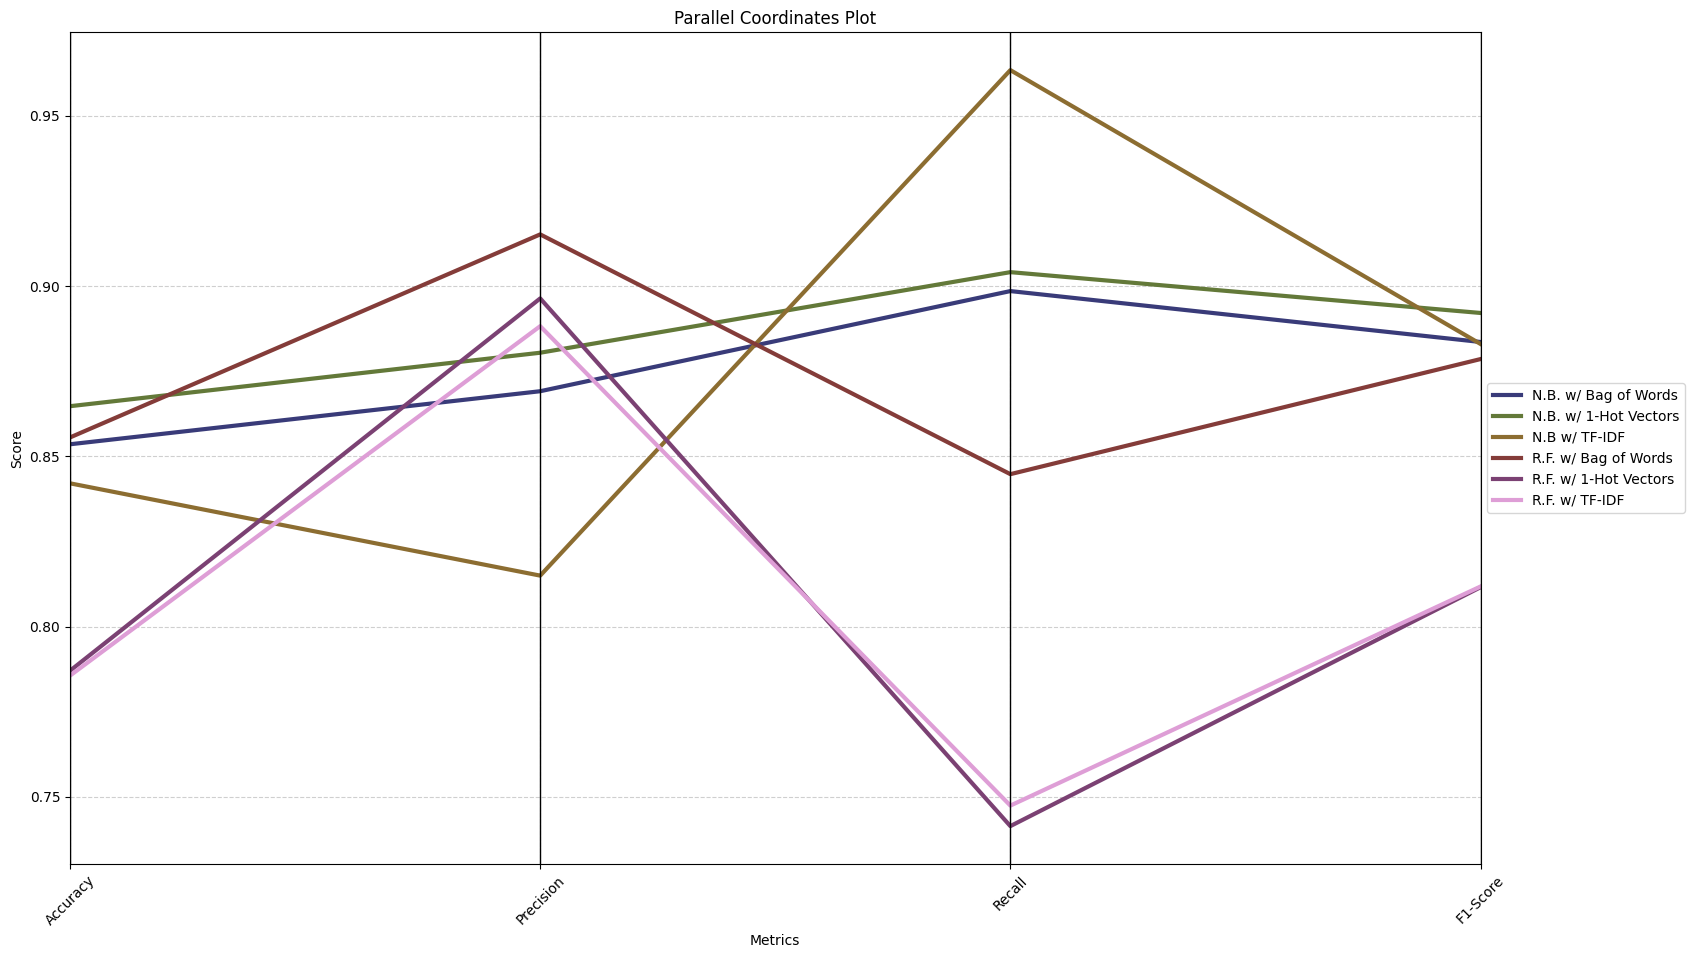

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a 'Model' column using the index of the DataFrame
cmap = cm.get_cmap('tab20b')

plt.figure(figsize=(1820/100, 1080/100))
plot = pd.plotting.parallel_coordinates(results, 'index', cols=['Accuracy', 'Precision', 'Recall', 'F1-Score'], colormap=cmap, linewidth = 3.0)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Parallel Coordinates Plot')
plt.legend(labels=results['index'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.savefig('model_comparison_4k.png', dpi=300, bbox_inches='tight')


plt.show()


## Time Series - Data Prep

In [ ]:
#from corpus print top 10 most frequent words
from collections import Counter
import itertools

# get all words in corpus
words = list(itertools.chain.from_iterable([review.split() for review in corpus]))
# count frequency of words
word_freq = Counter(words)
# sort words by frequency
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# print top 10 most frequent words
print(sorted_words[:10])

In [ ]:
#in reviews add a column named corpus with the stemmed text of each review
reviews['corpus'] = corpus
reviews.head()

In [ ]:
#split string from date column to get only the date
reviews['date'] = reviews['date'].str.split(' ', expand=True)[0]
reviews.head()

In [ ]:
#change 'date' column type from string to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

In [ ]:
from collections import Counter
import itertools
import pandas as pd

#create dataframe with two columns: date and words_count
words_per_day = pd.DataFrame(columns=['date', 'words_count'])

# Create an empty dictionary to store the results for each day
daily_top_keywords = {}

# Get unique dates from the 'date' column of your DataFrame
unique_dates = reviews['date'].dt.date.unique()  # Use dt.date to extract the date part

# Loop through each unique date and calculate the top keywords for that day
for day in unique_dates:
    # Get all reviews for the current day
    reviews_day = reviews[reviews['date'].dt.date == day]  # Use dt.date to compare the date part

    # Get all words in the corpus for the current day
    words = list(itertools.chain.from_iterable([review.split() for review in reviews_day['corpus']]))

    # Count the frequency of words
    word_freq = Counter(words)

    # Sort words by frequency
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    # Store the top keywords for the current day in the dictionary
    daily_top_keywords[day] = sorted_words[:10]

# Print the top keywords for each day
for day, top_keywords in daily_top_keywords.items():
    print(f"Top keywords for {day}:")
    for keyword, frequency in top_keywords:
        print(f"{keyword}: {frequency}")
    print("\n")


In [ ]:
from collections import Counter
import itertools
import pandas as pd

# Assuming you have a DataFrame named 'reviews' with columns 'date' and 'corpus'

# Create an empty list to store dictionaries
data_list = []

# Get unique dates from the 'date' column of your DataFrame
unique_dates = reviews['date'].dt.date.unique()  # Use dt.date to extract the date part

# Loop through each unique date and calculate the top keywords for that day
for day in unique_dates:
    # Get all reviews for the current day
    reviews_day = reviews[reviews['date'].dt.date == day]  # Use dt.date to compare the date part

    # Get all words in the corpus for the current day
    words = list(itertools.chain.from_iterable([review.split() for review in reviews_day['corpus']]))

    # Count the frequency of words
    word_freq = Counter(words)

    # Take the top 10 keywords for the current day
    top_keywords = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

    # Append a dictionary with 'date' and 'words/count' to the list
    data_list.append({'date': day, 'words/count': top_keywords})

# Create a new DataFrame from the list of dictionaries
result_df = pd.DataFrame(data_list)


In [ ]:
result_df